In [1]:
# Name: Savan Patel
# Date: 6/10/2024
# Assignment: 3b

# Download the mnist dataset for the assignment for the classification of the images

# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# fetching the data from the mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)


C:\Users\sawan\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Displaying the data
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
# Splitting the data into features and labels
X, y = mnist["data"], mnist["target"]

In [5]:
# Displaying the shape of the data
print(X.shape)

(70000, 784)


In [6]:
# Displaying the shape of the labels
print(y.shape)

(70000,)


In [16]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

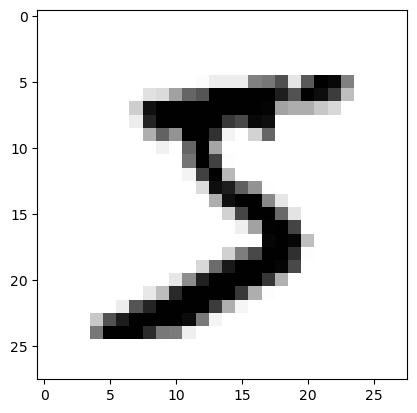

In [11]:
# Displaying the first image
some_digit = X[0]
# Displaying the first image
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")

In [25]:
# Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = np.roll(image, (dy, dx), axis=(0, 1))
    
    # Zero out the pixels that have shifted outside the image
    if dx > 0:
        shifted_image[:, :dx] = 0
    elif dx < 0:
        shifted_image[:, dx:] = 0
        
    if dy > 0:
        shifted_image[:dy, :] = 0
    elif dy < 0:
        shifted_image[dy:, :] = 0
    
    return shifted_image

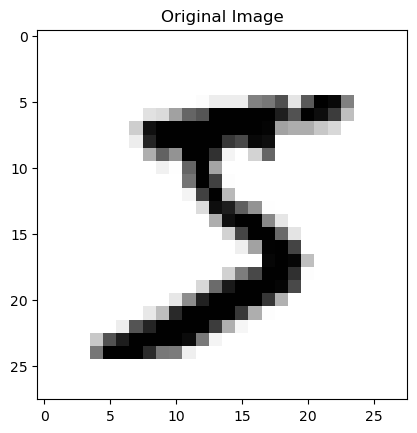

In [28]:
# Example of shifting an image and displaying it
some_digit_image = X_train[0].reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.title("Original Image")
plt.show()

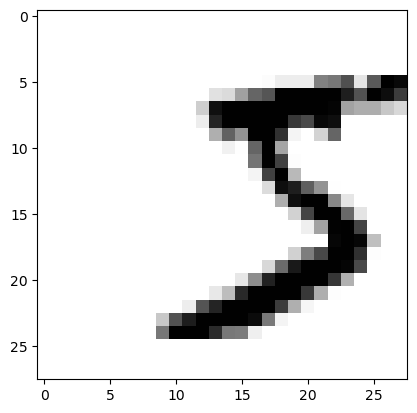

In [30]:
# Shifting the image to the right by 5 pixels
some_digit_right_shift_image = shift_image(some_digit_image, 5, 0)

plt.imshow(some_digit_right_shift_image, cmap="binary")

In [40]:
X_train_expanded = []
y_train_expanded = []

for image, label in zip(X_train, y_train):
    X_train_expanded.append(image.reshape(28, 28))
    y_train_expanded.append(label)
    for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
        X_train_expanded.append(shift_image(image, dx, dy))
        y_train_expanded.append(label)

In [42]:
X_train_expanded = np.array(X_train_expanded)

In [43]:
y_train_expanded = np.array(y_train_expanded)

In [44]:
X_train_expanded.shape

(300000, 28, 28)

In [45]:
y_train_expanded.shape

(300000,)

In [46]:
# Change the shape of the data to 2D
X_train_expanded = X_train_expanded.reshape(-1, 28*28)

In [47]:
X_train_expanded.shape

(300000, 784)

In [48]:
# Train the model using the original training data using the SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [49]:
# Predicting the first image
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

The model predicted the first image incorrectly. The next cell will evaluate the model using the cross_val_score.

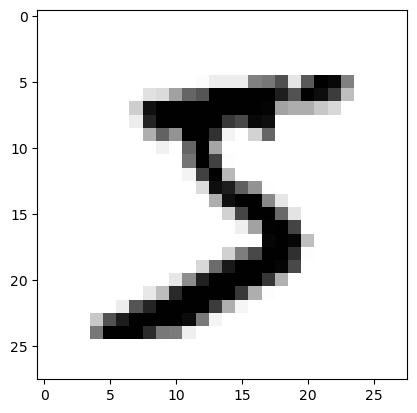

In [61]:
# show the original some_digit image
plt.imshow(some_digit_image, cmap="binary")

In [50]:
# Evaluating the model using the cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

The model has an accuracy of 87.365% which is good but not great. We can improve the model by using the expanded training data. The next cell will train the model using the expanded training data. 

In [52]:
# Train the model using the expanded training data using the SGDClassifier
sgd_clf_expanded = SGDClassifier(random_state=42)
sgd_clf_expanded.fit(X_train_expanded, y_train_expanded)

SGDClassifier(random_state=42)

In [53]:
# Predicting the first image
sgd_clf_expanded.predict([some_digit])

array(['3'], dtype='<U1')

In [54]:
# Evaluating the model using the cross_val_score
cross_val_score(sgd_clf_expanded, X_train_expanded, y_train_expanded, cv=3, scoring="accuracy")

array([0.77007, 0.82447, 0.85237])

The model has an accuracy of 85.23% which is lower than the model trained on the original training data. This is due to the fact that the expanded training data has more noise and the model is not able to generalize well. The next cell will train the model using the KNeighborsClassifier with the original training data.

In [55]:
# To evaluate the model more accurately use KNeighborsClassifier with original training data
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
# Predicting the first image
knn_clf.predict([some_digit])

array(['5'], dtype=object)

In [57]:
# Evaluating the model using the cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

The model has an accuracy of 96.75% which is great. The next cell will train the model using the expanded training data.

In [58]:
# To evaluate the model more accurately use KNeighborsClassifier with expanded training data
knn_clf_expanded = KNeighborsClassifier()
knn_clf_expanded.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier()

In [59]:
# Predicting the first image
knn_clf_expanded.predict([some_digit])

array(['5'], dtype='<U1')

In [60]:
# Evaluating the model using the cross_val_score
cross_val_score(knn_clf_expanded, X_train_expanded, y_train_expanded, cv=3, scoring="accuracy")

array([0.96987, 0.96981, 0.97007])

# Conclusion
The model has performed well with the accuracy of 96.75% using the KNeighborsClassifier with the original training data. The model has an accuracy of 85.23% using the SGDClassifier with the expanded training data. The KNeighborsClassifier has performed better than the SGDClassifier. The model can be further improved by using the hyperparameter tuning and using the different models.

The above results showed that expanding the dataset did not help improve the accuracy of the model. The model trained on the original training data performed better than the model trained on the expanded training data. This is because the expanded training data has more noise and the model is not able to generalize well.

# Author: Savan Patel